# Computer Vision - P2

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 24th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.

In [1]:
# Global necessary modules
import numpy as np
import matplotlib.pyplot as plt

Image info 
-------------------------
Shape: (1024, 768, 3)
Data type: uint8


/Users/neorefraction/.virtualenvs/Python/Vision-Artificial/lib/python3.11/site-packages/skimage/util/dtype.py:549: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return _convert(image, np.uint8, force_copy)


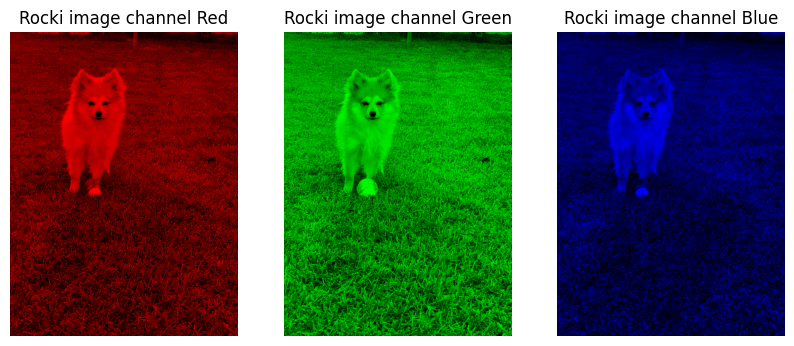

In [2]:
from skimage import io
from skimage.util import img_as_ubyte

# Reads the image
rocki_img = io.imread('./images_notebook/rocki.jpeg')

# Prints the image information
print(f'Image info \n{"-" * 25}\nShape: {rocki_img.shape}\nData type: {rocki_img.dtype}')

colors = ['Red', 'Green', 'Blue']  # Figure labels
colors_masks = [[1,0,0], [0,1,0], [0,0,1]]  # RGB masks

# Creates the figure
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# Adds each channel of the image to the figure
for i, mask in enumerate(colors_masks):
    ax = axs[i]
    ax.set_title(f'Rocki image channel {colors[i]}')
    ax.axis('off')
    ax.imshow(img_as_ubyte(rocki_img * mask), vmin=0, vmax=255)

# Displays the figure
plt.show()

b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'>

**Answer:** The histogram represents the total amount of each pixel value, so it can be a representation of the saturation or contrast of the image. On the other hand, each bin represent a range of values where a pixel can be located.

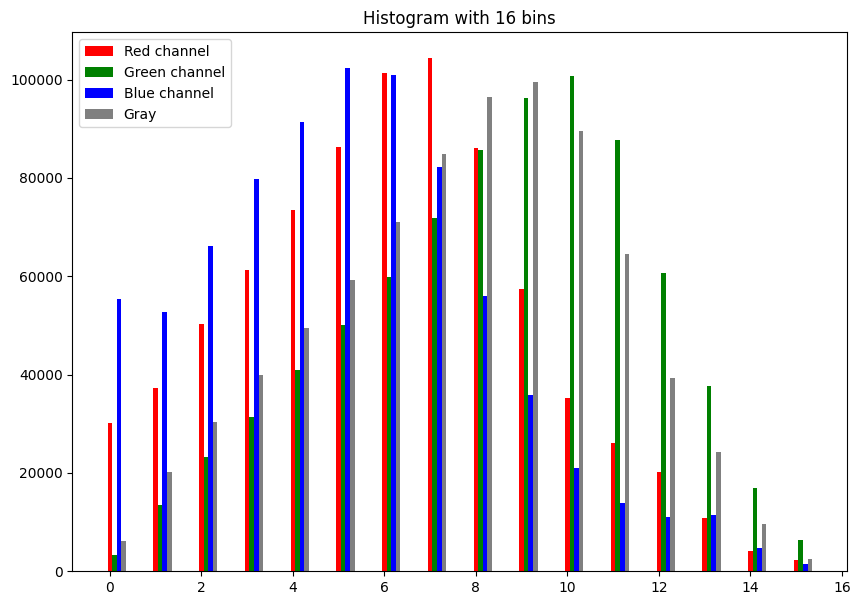

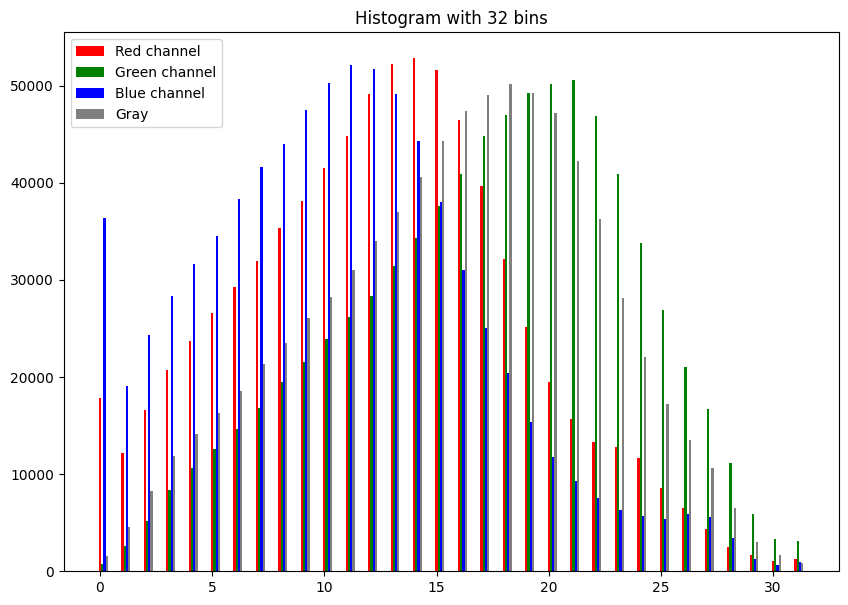

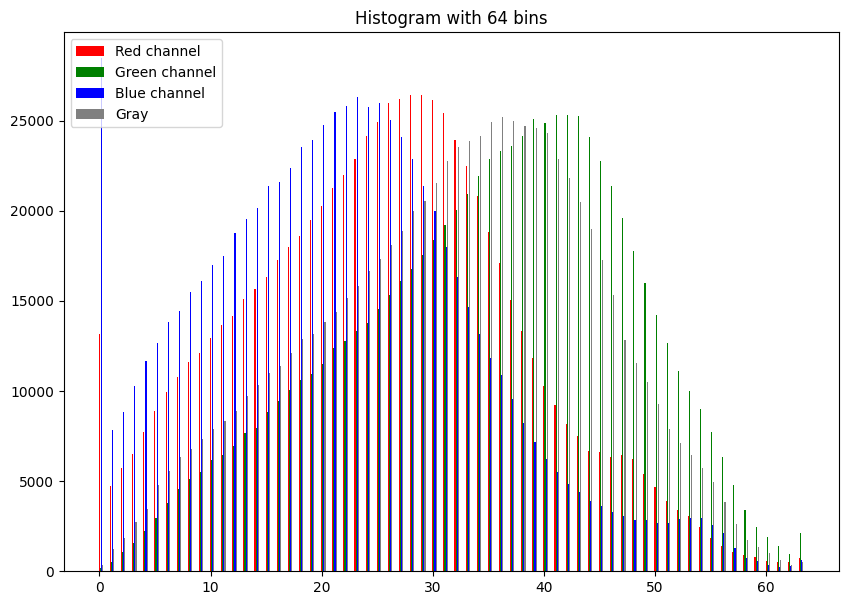

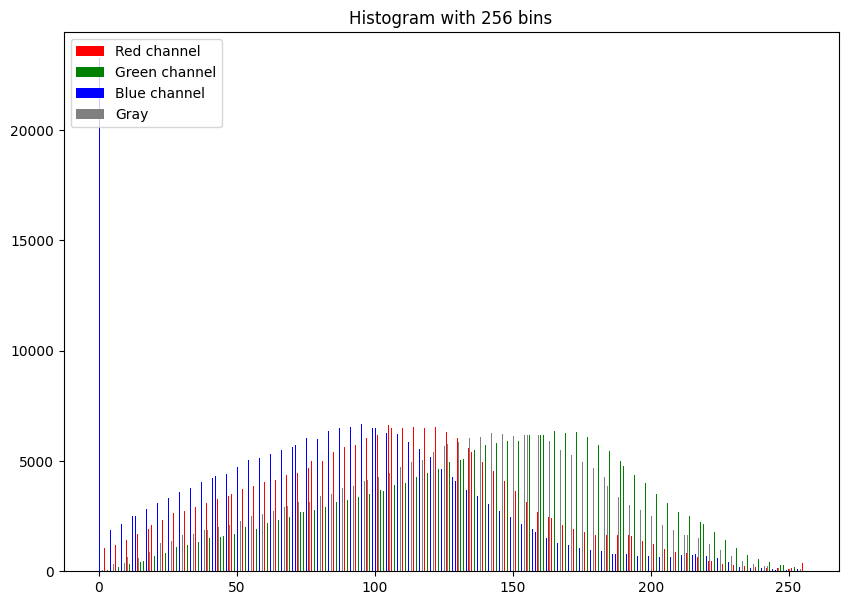

In [3]:
from skimage.color import rgb2gray
from skimage.util import img_as_float
from skimage.exposure import histogram


def im_hist(im: np.ndarray, nbins: int = 8) -> None:
    """
    Displays a histogram with the values of the grayscale and RGB channels from an image
    :param im: Input image on numpy array format
    :param nbins: Number of bins for the histogram. Default 8
    :return: None
    """
    
    labels = ('Red channel', 'Green channel', 'Blue channel', 'Gray')  # Legend labels
    
    # Gets each image histogram values with nbins
    hst_r, bins_r = histogram(img_as_float(im[:,:,0]), nbins=nbins)
    hst_g, bins_g = histogram(img_as_float(im[:,:,1]), nbins=nbins)
    hst_b, bins_b = histogram(img_as_float(im[:,:,2]), nbins=nbins)
    hst_gray, bins_gray = histogram(img_as_float(rgb2gray(im)), nbins=nbins)
    
    # x-axis coordinates of the bins
    ind = np.arange(nbins)
    
    # Configure the figure
    plt.figure(figsize=(10,7))
    plt.title(f'Histogram with {nbins} bins')
    
    # Add the bars to the graphic
    cl_r = plt.bar(ind, hst_r, .1, color='r')
    cl_g = plt.bar(ind + .1, hst_g, .1, color='g')
    cl_b = plt.bar(ind + .2, hst_b, .1, color='b')
    cl_gray = plt.bar(ind + .3, hst_gray, .1, color='gray')
    
    # Display the graphic
    plt.legend((cl_r[0], cl_g[0], cl_b[0], cl_gray[0]), labels, loc=2, prop={'size': 10})
    plt.show()

im_hist(rocki_img, 16)
im_hist(rocki_img, 32)
im_hist(rocki_img, 64)
im_hist(rocki_img, 256)
    

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each image.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


Answer: The first mask smooth the image on the vertical axis, the second one to the horizontal axis, and the last one affects to both as we can see on the result

In [4]:
# Necessary functions
from scipy.ndimage import convolve
from skimage.transform import resize

# Reads the image and reshape it to 256x256
rocki_img = resize(io.imread('./images_notebook/rocki.jpeg'), (256,256))

# Creates a 256x256 grayscale image of rocki
rocki_gray = img_as_ubyte(rgb2gray(rocki_img))

# Vectors to convolve the image
mask_1d = np.ones((15,1), dtype=np.uint8) / 15  # To normalize
mask_2d = np.ones((15,15), dtype=np.uint8) / (15*15)  # To normalize

# Applying convolution to the image
rocki_vertical_convolve = img_as_ubyte(convolve(rocki_gray, mask_1d))
rocki_horizontal_convolve = img_as_ubyte(convolve(rocki_gray, mask_1d.T))
rocki_convolve = img_as_ubyte(convolve(rocki_gray, mask_2d))

print(f'Images info\n{"-" * 25}')
print(f'rocki_vertical_convolve\nMax: {rocki_vertical_convolve.max()}\nMin: {rocki_vertical_convolve.min()}\nData type: {rocki_vertical_convolve.dtype}\n{"-" * 25}')
print(f'rocki_horizontal_convolve\nMax: {rocki_horizontal_convolve.max()}\nMin: {rocki_horizontal_convolve.min()}\nData type: {rocki_horizontal_convolve.dtype}\n{"-" * 25}')
print(f'rocki_convolve\nMax: {rocki_convolve.max()}\nMin: {rocki_convolve.min()}\nData type: {rocki_convolve.dtype}\n{"-" * 25}')

Images info
-------------------------
rocki_vertical_convolve
Max: 236
Min: 21
Data type: uint8
-------------------------
rocki_horizontal_convolve
Max: 244
Min: 23
Data type: uint8
-------------------------
rocki_convolve
Max: 217
Min: 34
Data type: uint8
-------------------------


b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


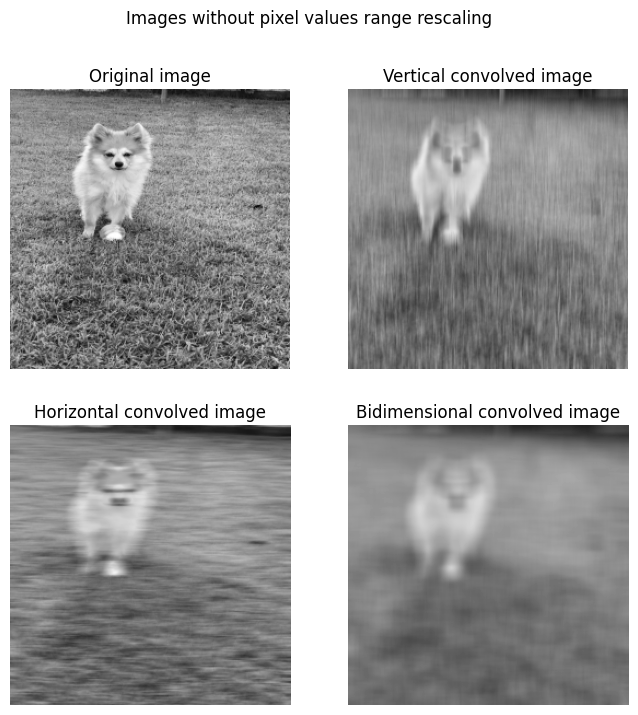

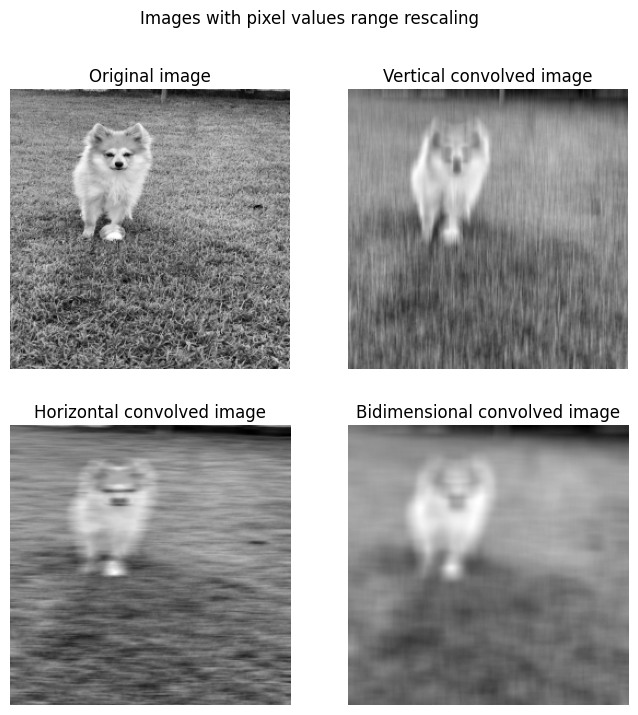

In [5]:
def show_convolved_images(images: np.ndarray, images_labels: list, title: str, rescaling: bool = False) -> None:
    # Creates a figure
    fig, axs = plt.subplots(2,2,figsize=(8,8))
    
    # Set the figure title
    plt.suptitle(title)
    
    # Adds each image to the figure
    for i, im in enumerate(images):
        ax = axs[(i//2)][i%2]
        ax.set_title(images_labels[i])
        ax.axis('off')
        if rescaling:
            ax.imshow(im, cmap='gray')
        else:
            ax.imshow(im, vmin=0, vmax=255, cmap='gray')
    
    # Displays the figure    
    plt.show()

rocki_images = [rocki_gray, rocki_vertical_convolve, rocki_horizontal_convolve, rocki_convolve]  # List with the images
labels = ['Original image', 'Vertical convolved image', 'Horizontal convolved image', 'Bidimensional convolved image']  # Figure labels

show_convolved_images(rocki_images, labels, 'Images without pixel values range rescaling')
show_convolved_images(rocki_images, labels, 'Images with pixel values range rescaling',True)

c) Can we convolve a color (RGB) image? 

Implement a function `conv_color(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.


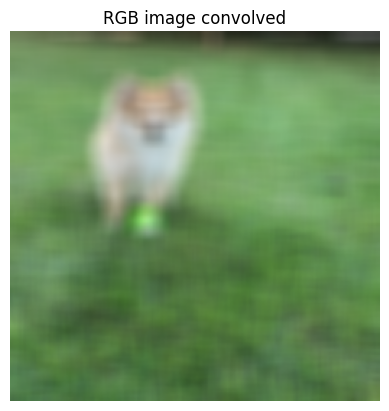

In [50]:
def conv_color(image: np.ndarray, mask: np.ndarray) -> None:
    """
    Convolve an RGB image with a uniform mask
    :param image: The input numpy image 
    :param mask: The input numpy array mask
    :return: void
    """
    # Convolve each channel of the image
    for i in range(3):
        image[:,:,i] = convolve(image[:,:,i], mask)

# Create a 256x256 copy of the rocki image
rocki_reshape = resize(rocki_img, (256, 256))

# Convolves the RGB image with a 15x15 uniform mask
conv_color(rocki_reshape, np.ones((15, 15), dtype=np.uint8)/(15*15))

rocki_reshape = img_as_ubyte(rocki_reshape)

# Configure the figure
plt.title('RGB image convolved')
plt.axis('off')
plt.imshow(rocki_reshape, vmin=0, vmax=255)

# Displays the figure
plt.show()


### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.

**Answer:** The principal difference is that the reduced image has a lower number of pixels so the values amounts are lower too.


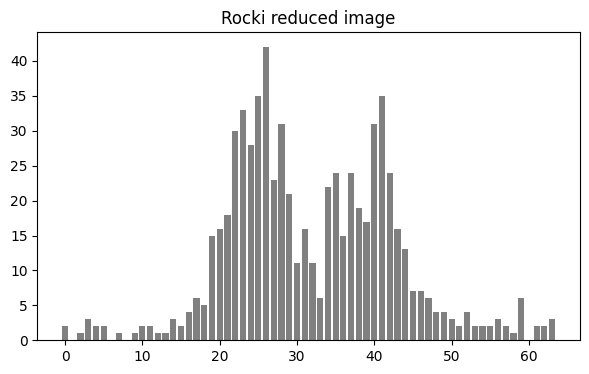

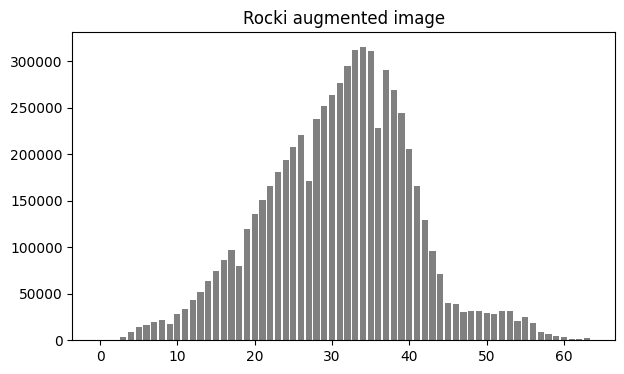

In [7]:
from skimage.transform import rescale

# Creates the reduced and augmented image respectively
rocki_gray_reduce10 = img_as_ubyte(rescale(rocki_gray, 0.1))
rocki_gray_augment10 = img_as_ubyte(rescale(rocki_gray, 10))


def gray_im_hist(image: np.ndarray, title: str, nbins: int = 8) -> None:
    """
    Displays a histogram with the values of a grayscale image
    :param image: 
    :param title:
    :param nbins: 
    :return: 
    """
    
    # Configure the figure
    plt.figure(figsize=(7,4))
    plt.title(title)
    
    hst, bins = histogram(img_as_float(image), nbins=nbins)
    
    ind = np.arange(nbins)
    
    plt.bar(ind, hst, color='gray')
    
    # Display the graphic
    plt.show()
    
gray_im_hist(rocki_gray_reduce10, 'Rocki reduced image', 64)
gray_im_hist(rocki_gray_augment10, 'Rocki augmented image', 64)

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray`image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why.

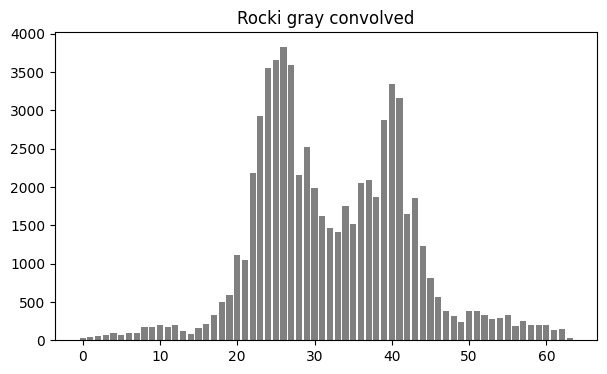

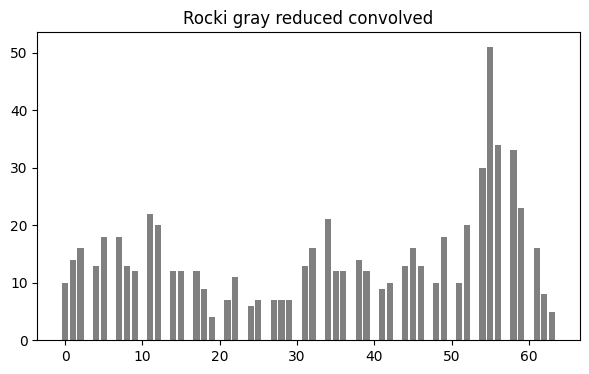

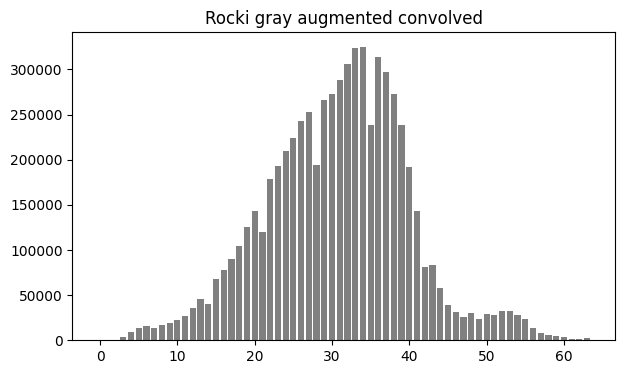

In [8]:
mask = np.ones((15,15), dtype=np.uint8) / (15*15)  # To normalize

rocki_gray_convolved = convolve(rocki_gray, mask)
rocki_reduced_convolved = convolve(rocki_gray_reduce10, mask)
rocki_augmented_convolved = convolve(rocki_gray_augment10, mask)

gray_im_hist(rocki_gray_convolved, 'Rocki gray convolved', 64)
gray_im_hist(rocki_reduced_convolved, 'Rocki gray reduced convolved', 64)
gray_im_hist(rocki_augmented_convolved, 'Rocki gray augmented convolved', 64)

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

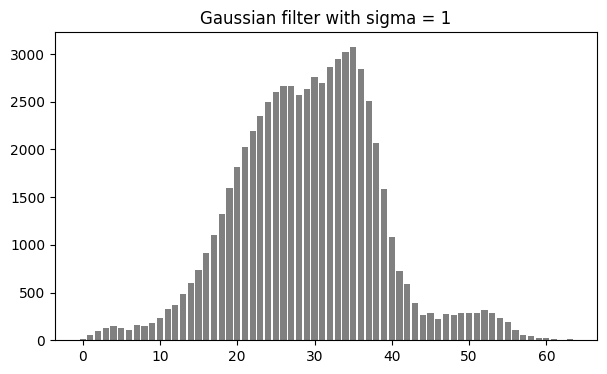

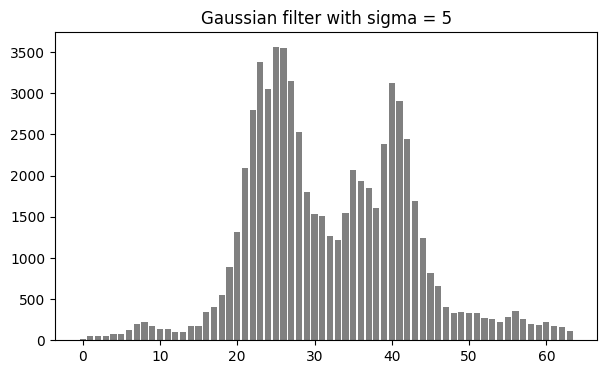

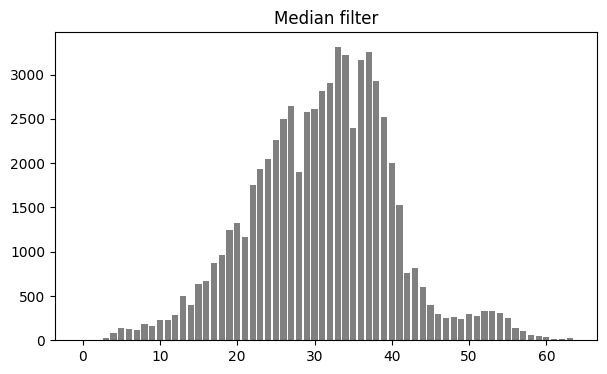

In [9]:
from skimage.filters import gaussian, median

# Applies the kernels
rocki_gaussian_filtered_1 = gaussian(rocki_gray)
rocki_gaussian_filtered_n = gaussian(rocki_gray, sigma=5)
rocki_median_filtered = median(rocki_gray)

# Displays the histogram of the filtered images
gray_im_hist(rocki_gaussian_filtered_1, 'Gaussian filter with sigma = 1', 64)
gray_im_hist(rocki_gaussian_filtered_n, 'Gaussian filter with sigma = 5', 64)
gray_im_hist(rocki_median_filtered, 'Median filter', 64)


b) **(Optional)** Apply the smoothing on some other images and present their results.

In [10]:
#your solution

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

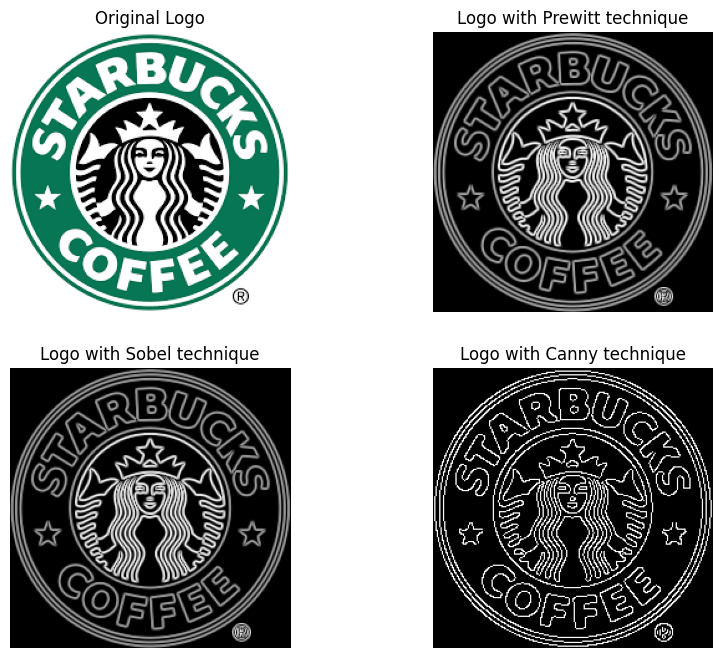

In [11]:
import warnings
warnings.filterwarnings("ignore")

"""Your Solution"""
from skimage.feature import canny
from skimage.color import rgba2rgb
from skimage.filters import prewitt, sobel

logo_img = io.imread('./images_notebook/logo.png')
logo_gray = rgb2gray(rgba2rgb(logo_img))

logo_prewitt = prewitt(logo_gray)
logo_sobel = sobel(logo_gray)
logo_canny = canny(logo_gray)

logo_images = [logo_img, logo_prewitt, logo_sobel, logo_canny]
figure_labels = ['Original Logo', 'Logo with Prewitt technique', 'Logo with Sobel technique', 'Logo with Canny technique']

fig, axs = plt.subplots(2,2,figsize=(10,8))

for i, img in enumerate(logo_images):
    ax = axs[i//2][i%2]
    ax.set_title(figure_labels[i])
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    
plt.show()

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed? 
- Which are the limitations of the different images contour extraction?

**Answer:** Yes, the contours improved afetr smoothed the image that's due to ... The limitation of Prewitt ...

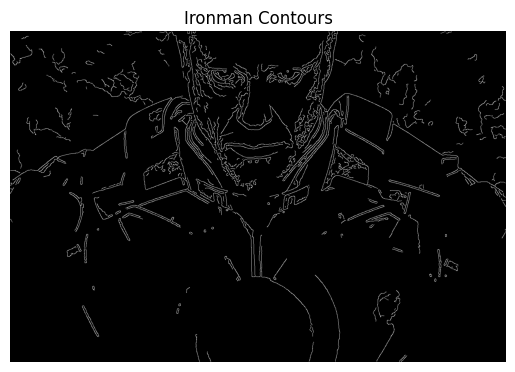

In [12]:
ironman_img = io.imread('./images_notebook/Ironman.jpg')

ironman_gray = img_as_ubyte(rgb2gray(ironman_img))
ironman_smoothed = gaussian(ironman_gray, sigma=2)
ironman_edges = canny(ironman_smoothed)

plt.axis('off')
plt.title('Ironman Contours')
plt.imshow(ironman_edges, cmap='gray')

plt.show()

c) How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


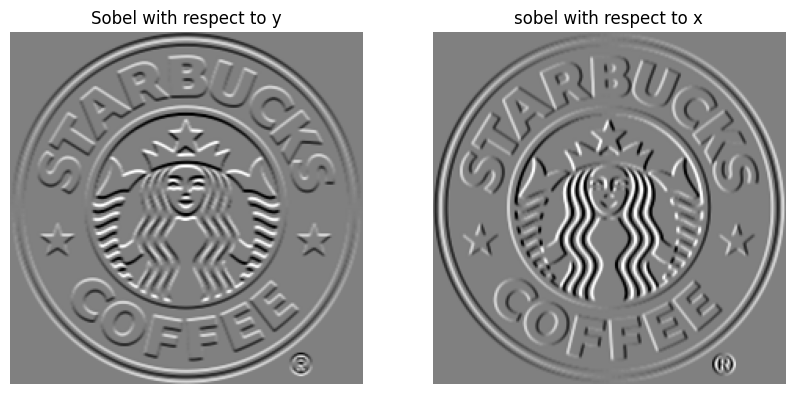

In [13]:
from skimage.filters import sobel_h, sobel_v

logo_sobel_h = sobel_h(logo_gray)
logo_sobel_v = sobel_v(logo_gray)

images = [logo_sobel_h, logo_sobel_v]
labels = ['Sobel with respect to y', 'sobel with respect to x']

fig, axs = plt.subplots(1,2,figsize=(10,8))

for i, img in enumerate(images):
    ax = axs[i]
    ax.set_title(labels[i])
    ax.axis('off')
    ax.imshow(img, cmap='gray')

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

<img src="images_notebook/Capitain.png" width="800" height="800">
<img src="images_notebook/Ironman.png" width="800" height="800">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

In [56]:
ironman_img = io.imread('./images_notebook/Ironman.jpg')
capitain_img = resize(io.imread('./images_notebook/Capitain_America.jpg'), ironman_img.shape)

def gauss_color(img: np.ndarray, sigma: int) -> np.ndarray:
    
    for i in range(3):
        img[:,:,i] = gaussian(img[:,:,i], sigma=sigma)
        
ironman_low_pass = ironman_img.copy()
gauss_color(ironman_low_pass, 2)
capitain_low_pass = capitain_img.copy()
gauss_color(capitain_low_pass, 2)

print(type(capitain_low_pass))

ironman_high_pass = ironman_img - ironman_low_pass
capitain_high_pass = capitain_img - capitain_low_pass

<class 'numpy.ndarray'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


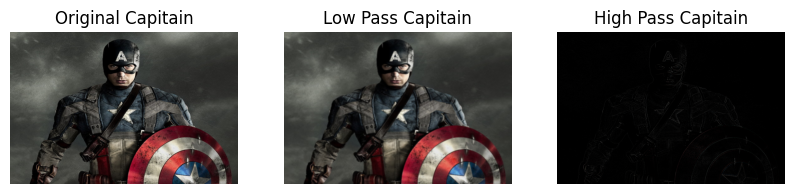

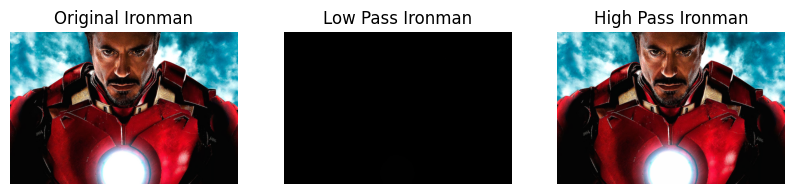

In [57]:
capitain_images = [capitain_img, capitain_low_pass, capitain_high_pass]
capitain_labels = ['Original Capitain', 'Low Pass Capitain', 'High Pass Capitain']

fig, axs = plt.subplots(1,3, figsize=(10,8))

for i, img in enumerate(capitain_images):
    ax = axs[i]
    ax.set_title(capitain_labels[i])
    ax.axis('off')
    ax.imshow(img)
    
ironman_images = [ironman_img, ironman_low_pass, ironman_high_pass]
ironman_labels = ['Original Ironman', 'Low Pass Ironman', 'High Pass Ironman']

fig, axs = plt.subplots(1,3, figsize=(10,8))

for i, img in enumerate(ironman_images):
    ax = axs[i]
    ax.set_title(ironman_labels[i])
    ax.axis('off')
    ax.imshow(img)

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png" width="800" height="800">


In [ ]:
images = [ironman_low_pass + capitain_high_pass, capitain_low_pass + ironman_high_pass]
fig, axs = plt.subplots(1,2, figsize=(10,8))

for i, img in enumerate(images):
    ax = axs[i]
    ax.axis('off')
    ax.imshow(img)
    
plt.show()

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

In [ ]:

""""Showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale, multichannel=True)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg

def updatefig1(i): 
    im.set_array(ic_small[:,:,:,i]) #showing the small image
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore")